In [1]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

C:\Users\manpreetsingh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("C:/Users/manpreetsingh/Downloads/creditcardfraud/creditcard.csv",header = 0)

In [3]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times=0.0):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,int(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    #print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    #print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    #print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

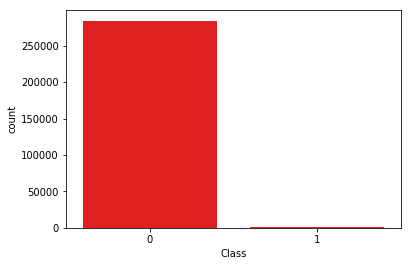

In [4]:
sns.countplot("Class",data=data,color='Red')

In [5]:
# now let us check in the number of Percentage
Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


In [6]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    rcall = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
    print("recall inside",rcall)
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    return rcall

In [7]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [8]:
# before starting we should standridze our ampount column
data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


the undersample data for 1.25 proportion

------------------------------------------------------------

the model classification for 1.25 proportion

length of training data
774
length of test data
333

the recall for this model is : 0.853333333333
recall inside 0.853333333333
TP 128
TN 177
FP 6
FN 22


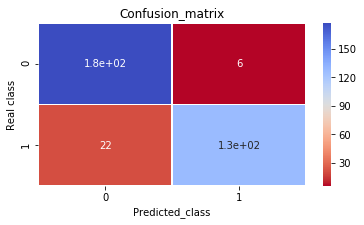


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.89      0.97      0.93       183
          1       0.96      0.85      0.90       150

avg / total       0.92      0.92      0.92       333

recall value test 0.853333333333
________________________________________________________________________________________________________
the undersample data for 1.5 proportion

------------------------------------------------------------

the model classification for 1.5 proportion

length of training data
861
length of test data
369

the recall for this model is : 0.933333333333
recall inside 0.933333333333
TP 154
TN 197
FP 7
FN 11


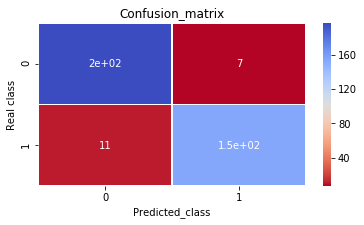


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       204
          1       0.96      0.93      0.94       165

avg / total       0.95      0.95      0.95       369

recall value test 0.933333333333
________________________________________________________________________________________________________
the undersample data for 1.75 proportion

------------------------------------------------------------

the model classification for 1.75 proportion

length of training data
947
length of test data
406

the recall for this model is : 0.900621118012
recall inside 0.900621118012
TP 145
TN 240
FP 5
FN 16


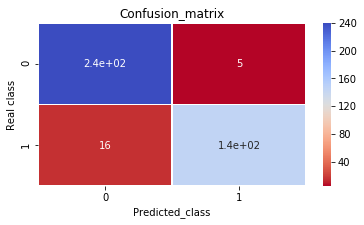


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       245
          1       0.97      0.90      0.93       161

avg / total       0.95      0.95      0.95       406

recall value test 0.900621118012
________________________________________________________________________________________________________
the undersample data for 2.0 proportion

------------------------------------------------------------

the model classification for 2.0 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.91095890411
recall inside 0.91095890411
TP 133
TN 290
FP 7
FN 13


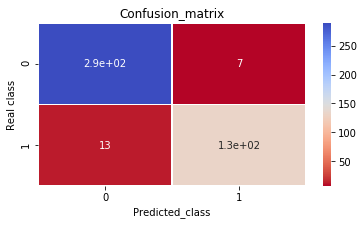


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       297
          1       0.95      0.91      0.93       146

avg / total       0.95      0.95      0.95       443

recall value test 0.91095890411
________________________________________________________________________________________________________
the undersample data for 2.25 proportion

------------------------------------------------------------

the model classification for 2.25 proportion

length of training data
1119
length of test data
480

the recall for this model is : 0.922535211268
recall inside 0.922535211268
TP 131
TN 332
FP 6
FN 11


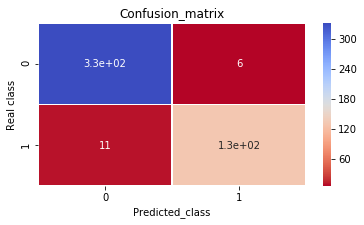


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       338
          1       0.96      0.92      0.94       142

avg / total       0.96      0.96      0.96       480

recall value test 0.922535211268
________________________________________________________________________________________________________
the undersample data for 2.5 proportion

------------------------------------------------------------

the model classification for 2.5 proportion

length of training data
1205
length of test data
517

the recall for this model is : 0.901315789474
recall inside 0.901315789474
TP 137
TN 360
FP 5
FN 15


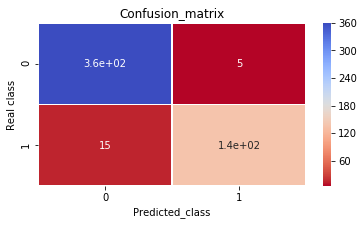


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       365
          1       0.96      0.90      0.93       152

avg / total       0.96      0.96      0.96       517

recall value test 0.901315789474
________________________________________________________________________________________________________
the undersample data for 2.75 proportion

------------------------------------------------------------

the model classification for 2.75 proportion

length of training data
1291
length of test data
554

the recall for this model is : 0.930555555556
recall inside 0.930555555556
TP 134
TN 404
FP 6
FN 10


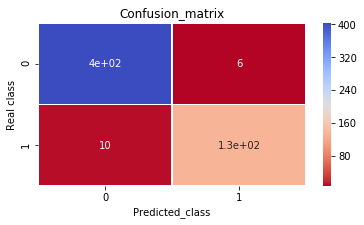


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       410
          1       0.96      0.93      0.94       144

avg / total       0.97      0.97      0.97       554

recall value test 0.930555555556
________________________________________________________________________________________________________
the undersample data for 3.0 proportion

------------------------------------------------------------

the model classification for 3.0 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.913333333333
recall inside 0.913333333333
TP 137
TN 436
FP 5
FN 13


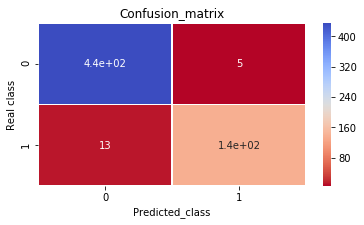


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       441
          1       0.96      0.91      0.94       150

avg / total       0.97      0.97      0.97       591

recall value test 0.913333333333
________________________________________________________________________________________________________
the undersample data for 3.25 proportion

------------------------------------------------------------

the model classification for 3.25 proportion

length of training data
1463
length of test data
628

the recall for this model is : 0.888888888889
recall inside 0.888888888889
TP 144
TN 459
FP 7
FN 18


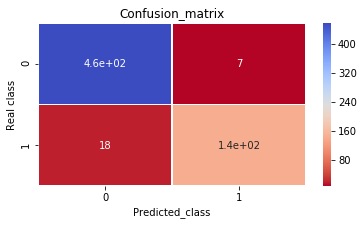


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       466
          1       0.95      0.89      0.92       162

avg / total       0.96      0.96      0.96       628

recall value test 0.888888888889
________________________________________________________________________________________________________
the undersample data for 3.5 proportion

------------------------------------------------------------

the model classification for 3.5 proportion

length of training data
1549
length of test data
665

the recall for this model is : 0.854304635762
recall inside 0.854304635762
TP 129
TN 505
FP 9
FN 22


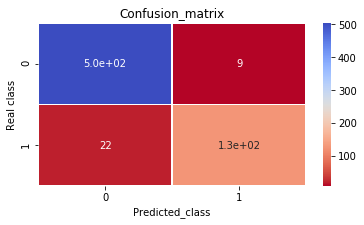


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       514
          1       0.93      0.85      0.89       151

avg / total       0.95      0.95      0.95       665

recall value test 0.854304635762
________________________________________________________________________________________________________
the undersample data for 3.75 proportion

------------------------------------------------------------

the model classification for 3.75 proportion

length of training data
1635
length of test data
702

the recall for this model is : 0.911111111111
recall inside 0.911111111111
TP 123
TN 560
FP 7
FN 12


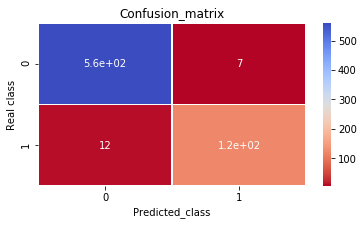


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       567
          1       0.95      0.91      0.93       135

avg / total       0.97      0.97      0.97       702

recall value test 0.911111111111
________________________________________________________________________________________________________
the undersample data for 4.0 proportion

------------------------------------------------------------

the model classification for 4.0 proportion

length of training data
1722
length of test data
738

the recall for this model is : 0.90625
recall inside 0.90625
TP 145
TN 566
FP 12
FN 15


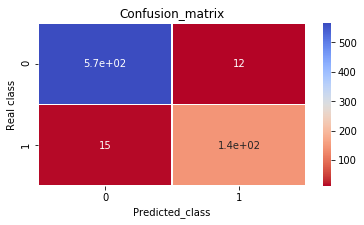


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       578
          1       0.92      0.91      0.91       160

avg / total       0.96      0.96      0.96       738

recall value test 0.90625
________________________________________________________________________________________________________
the undersample data for 4.25 proportion

------------------------------------------------------------

the model classification for 4.25 proportion

length of training data
1808
length of test data
775

the recall for this model is : 0.909090909091
recall inside 0.909090909091
TP 140
TN 617
FP 4
FN 14


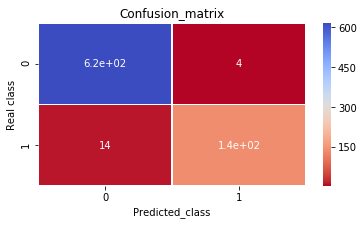


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       621
          1       0.97      0.91      0.94       154

avg / total       0.98      0.98      0.98       775

recall value test 0.909090909091
________________________________________________________________________________________________________
the undersample data for 4.5 proportion

------------------------------------------------------------

the model classification for 4.5 proportion

length of training data
1894
length of test data
812

the recall for this model is : 0.867549668874
recall inside 0.867549668874
TP 131
TN 654
FP 7
FN 20


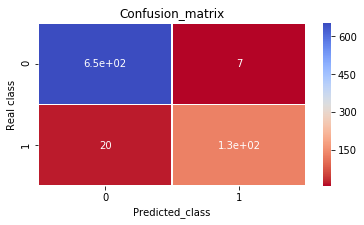


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       661
          1       0.95      0.87      0.91       151

avg / total       0.97      0.97      0.97       812

recall value test 0.867549668874
________________________________________________________________________________________________________
the undersample data for 4.75 proportion

------------------------------------------------------------

the model classification for 4.75 proportion

length of training data
1980
length of test data
849

the recall for this model is : 0.85
recall inside 0.85
TP 119
TN 703
FP 6
FN 21


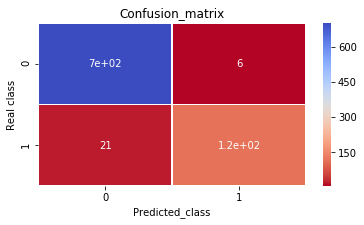


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       709
          1       0.95      0.85      0.90       140

avg / total       0.97      0.97      0.97       849

recall value test 0.85
________________________________________________________________________________________________________
the undersample data for 5.0 proportion

------------------------------------------------------------

the model classification for 5.0 proportion

length of training data
2066
length of test data
886

the recall for this model is : 0.867549668874
recall inside 0.867549668874
TP 131
TN 727
FP 8
FN 20


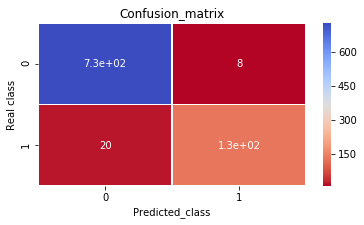


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       735
          1       0.94      0.87      0.90       151

avg / total       0.97      0.97      0.97       886

recall value test 0.867549668874
________________________________________________________________________________________________________
the undersample data for 5.25 proportion

------------------------------------------------------------

the model classification for 5.25 proportion

length of training data
2152
length of test data
923

the recall for this model is : 0.847133757962
recall inside 0.847133757962
TP 133
TN 764
FP 2
FN 24


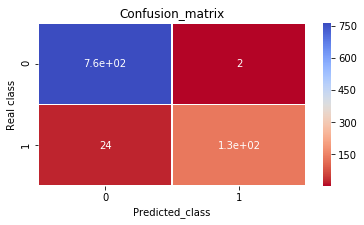


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       766
          1       0.99      0.85      0.91       157

avg / total       0.97      0.97      0.97       923

recall value test 0.847133757962
________________________________________________________________________________________________________
the undersample data for 5.5 proportion

------------------------------------------------------------

the model classification for 5.5 proportion

length of training data
2238
length of test data
960

the recall for this model is : 0.825
recall inside 0.825
TP 132
TN 793
FP 7
FN 28


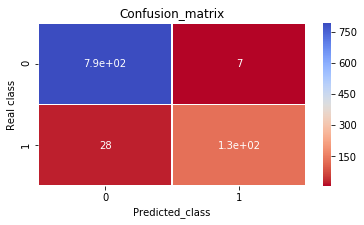


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       800
          1       0.95      0.82      0.88       160

avg / total       0.96      0.96      0.96       960

recall value test 0.825
________________________________________________________________________________________________________
the undersample data for 5.75 proportion

------------------------------------------------------------

the model classification for 5.75 proportion

length of training data
2324
length of test data
997

the recall for this model is : 0.854304635762
recall inside 0.854304635762
TP 129
TN 841
FP 5
FN 22


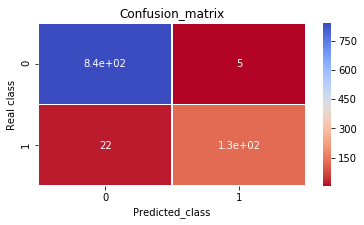


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       846
          1       0.96      0.85      0.91       151

avg / total       0.97      0.97      0.97       997

recall value test 0.854304635762
________________________________________________________________________________________________________
the undersample data for 6.0 proportion

------------------------------------------------------------

the model classification for 6.0 proportion

length of training data
2410
length of test data
1034

the recall for this model is : 0.886524822695
recall inside 0.886524822695
TP 125
TN 887
FP 6
FN 16


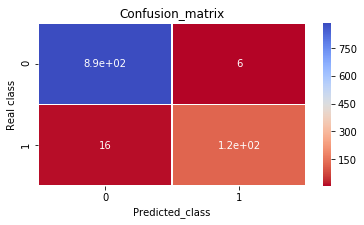


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       893
          1       0.95      0.89      0.92       141

avg / total       0.98      0.98      0.98      1034

recall value test 0.886524822695
________________________________________________________________________________________________________
the undersample data for 6.25 proportion

------------------------------------------------------------

the model classification for 6.25 proportion

length of training data
2496
length of test data
1071

the recall for this model is : 0.839416058394
recall inside 0.839416058394
TP 115
TN 932
FP 2
FN 22


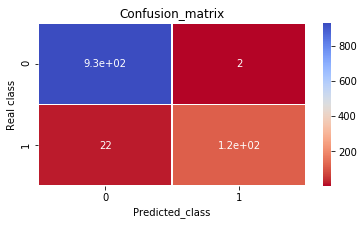


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       934
          1       0.98      0.84      0.91       137

avg / total       0.98      0.98      0.98      1071

recall value test 0.839416058394
________________________________________________________________________________________________________
the undersample data for 6.5 proportion

------------------------------------------------------------

the model classification for 6.5 proportion

length of training data
2583
length of test data
1107

the recall for this model is : 0.886524822695
recall inside 0.886524822695
TP 125
TN 959
FP 7
FN 16


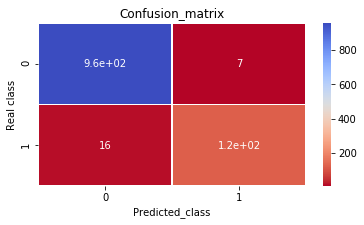


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       966
          1       0.95      0.89      0.92       141

avg / total       0.98      0.98      0.98      1107

recall value test 0.886524822695
________________________________________________________________________________________________________
the undersample data for 6.75 proportion

------------------------------------------------------------

the model classification for 6.75 proportion

length of training data
2669
length of test data
1144

the recall for this model is : 0.841059602649
recall inside 0.841059602649
TP 127
TN 990
FP 3
FN 24


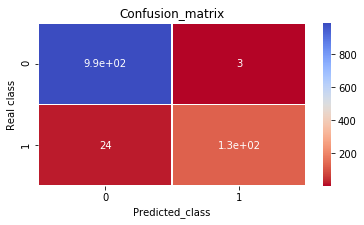


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       993
          1       0.98      0.84      0.90       151

avg / total       0.98      0.98      0.98      1144

recall value test 0.841059602649
________________________________________________________________________________________________________
the undersample data for 7.0 proportion

------------------------------------------------------------

the model classification for 7.0 proportion

length of training data
2755
length of test data
1181

the recall for this model is : 0.903846153846
recall inside 0.903846153846
TP 141
TN 1019
FP 6
FN 15


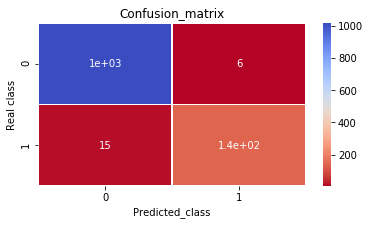


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1025
          1       0.96      0.90      0.93       156

avg / total       0.98      0.98      0.98      1181

recall value test 0.903846153846
________________________________________________________________________________________________________
the undersample data for 7.25 proportion

------------------------------------------------------------

the model classification for 7.25 proportion

length of training data
2841
length of test data
1218

the recall for this model is : 0.896774193548
recall inside 0.896774193548
TP 139
TN 1062
FP 1
FN 16


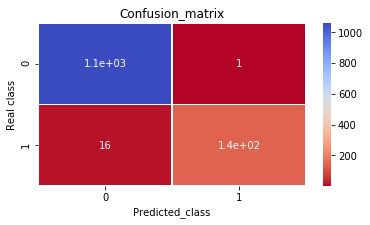


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1063
          1       0.99      0.90      0.94       155

avg / total       0.99      0.99      0.99      1218

recall value test 0.896774193548
________________________________________________________________________________________________________
the undersample data for 7.5 proportion

------------------------------------------------------------

the model classification for 7.5 proportion

length of training data
2927
length of test data
1255

the recall for this model is : 0.891719745223
recall inside 0.891719745223
TP 140
TN 1092
FP 6
FN 17


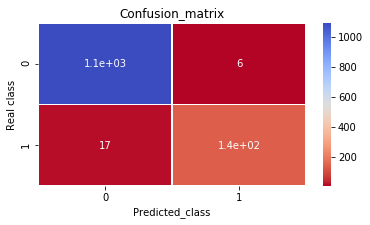


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1098
          1       0.96      0.89      0.92       157

avg / total       0.98      0.98      0.98      1255

recall value test 0.891719745223
________________________________________________________________________________________________________
the undersample data for 7.75 proportion

------------------------------------------------------------

the model classification for 7.75 proportion

length of training data
3013
length of test data
1292

the recall for this model is : 0.859154929577
recall inside 0.859154929577
TP 122
TN 1139
FP 11
FN 20


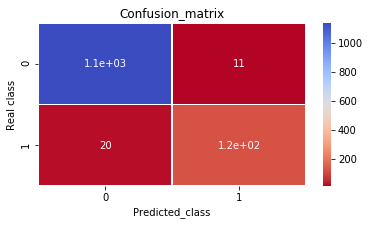


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1150
          1       0.92      0.86      0.89       142

avg / total       0.98      0.98      0.98      1292

recall value test 0.859154929577
________________________________________________________________________________________________________
the undersample data for 8.0 proportion

------------------------------------------------------------

the model classification for 8.0 proportion

length of training data
3099
length of test data
1329

the recall for this model is : 0.842767295597
recall inside 0.842767295597
TP 134
TN 1168
FP 2
FN 25


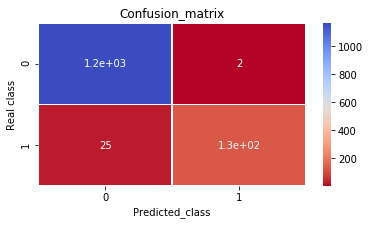


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1170
          1       0.99      0.84      0.91       159

avg / total       0.98      0.98      0.98      1329

recall value test 0.842767295597
________________________________________________________________________________________________________
the undersample data for 8.25 proportion

------------------------------------------------------------

the model classification for 8.25 proportion

length of training data
3185
length of test data
1366

the recall for this model is : 0.863354037267
recall inside 0.863354037267
TP 139
TN 1202
FP 3
FN 22


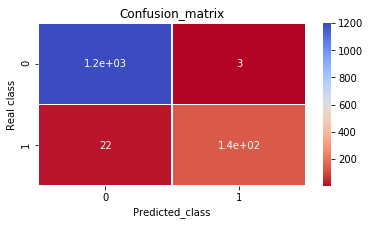


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1205
          1       0.98      0.86      0.92       161

avg / total       0.98      0.98      0.98      1366

recall value test 0.863354037267
________________________________________________________________________________________________________
the undersample data for 8.5 proportion

------------------------------------------------------------

the model classification for 8.5 proportion

length of training data
3271
length of test data
1403

the recall for this model is : 0.848101265823
recall inside 0.848101265823
TP 134
TN 1239
FP 6
FN 24


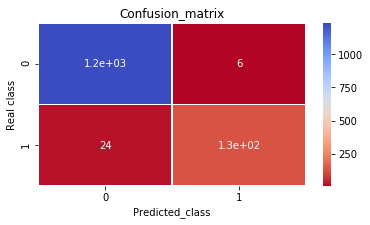


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1245
          1       0.96      0.85      0.90       158

avg / total       0.98      0.98      0.98      1403

recall value test 0.848101265823
________________________________________________________________________________________________________
the undersample data for 8.75 proportion

------------------------------------------------------------

the model classification for 8.75 proportion

length of training data
3357
length of test data
1440

the recall for this model is : 0.902097902098
recall inside 0.902097902098
TP 129
TN 1295
FP 2
FN 14


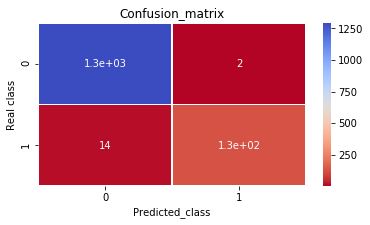


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1297
          1       0.98      0.90      0.94       143

avg / total       0.99      0.99      0.99      1440

recall value test 0.902097902098
________________________________________________________________________________________________________
the undersample data for 9.0 proportion

------------------------------------------------------------

the model classification for 9.0 proportion

length of training data
3444
length of test data
1476

the recall for this model is : 0.878571428571
recall inside 0.878571428571
TP 123
TN 1336
FP 0
FN 17


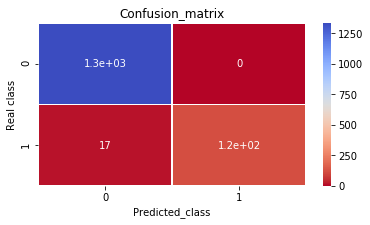


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1336
          1       1.00      0.88      0.94       140

avg / total       0.99      0.99      0.99      1476

recall value test 0.878571428571
________________________________________________________________________________________________________
the undersample data for 9.25 proportion

------------------------------------------------------------

the model classification for 9.25 proportion

length of training data
3530
length of test data
1513

the recall for this model is : 0.847682119205
recall inside 0.847682119205
TP 128
TN 1358
FP 4
FN 23


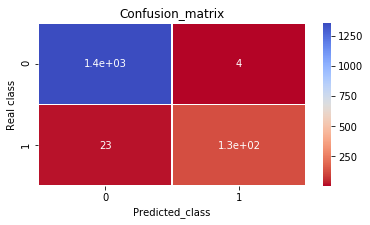


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1362
          1       0.97      0.85      0.90       151

avg / total       0.98      0.98      0.98      1513

recall value test 0.847682119205
________________________________________________________________________________________________________
the undersample data for 9.5 proportion

------------------------------------------------------------

the model classification for 9.5 proportion

length of training data
3616
length of test data
1550

the recall for this model is : 0.892086330935
recall inside 0.892086330935
TP 124
TN 1407
FP 4
FN 15


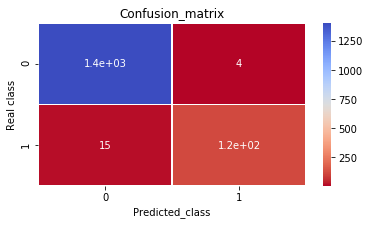


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1411
          1       0.97      0.89      0.93       139

avg / total       0.99      0.99      0.99      1550

recall value test 0.892086330935
________________________________________________________________________________________________________
the undersample data for 9.75 proportion

------------------------------------------------------------

the model classification for 9.75 proportion

length of training data
3702
length of test data
1587

the recall for this model is : 0.854304635762
recall inside 0.854304635762
TP 129
TN 1430
FP 6
FN 22


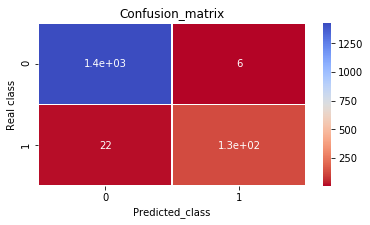


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1436
          1       0.96      0.85      0.90       151

avg / total       0.98      0.98      0.98      1587

recall value test 0.854304635762
________________________________________________________________________________________________________
the undersample data for 10.0 proportion

------------------------------------------------------------

the model classification for 10.0 proportion

length of training data
3788
length of test data
1624

the recall for this model is : 0.865497076023
recall inside 0.865497076023
TP 148
TN 1450
FP 3
FN 23


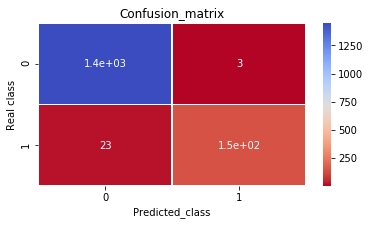


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1453
          1       0.98      0.87      0.92       171

avg / total       0.98      0.98      0.98      1624

recall value test 0.865497076023
________________________________________________________________________________________________________
the undersample data for 10.25 proportion

------------------------------------------------------------

the model classification for 10.25 proportion

length of training data
3874
length of test data
1661

the recall for this model is : 0.879746835443
recall inside 0.879746835443
TP 139
TN 1501
FP 2
FN 19


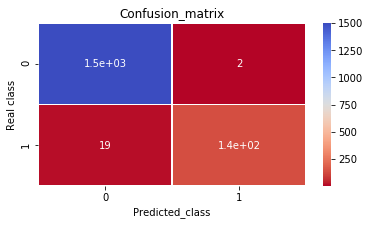


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1503
          1       0.99      0.88      0.93       158

avg / total       0.99      0.99      0.99      1661

recall value test 0.879746835443
________________________________________________________________________________________________________
the undersample data for 10.5 proportion

------------------------------------------------------------

the model classification for 10.5 proportion

length of training data
3960
length of test data
1698

the recall for this model is : 0.841059602649
recall inside 0.841059602649
TP 127
TN 1546
FP 1
FN 24


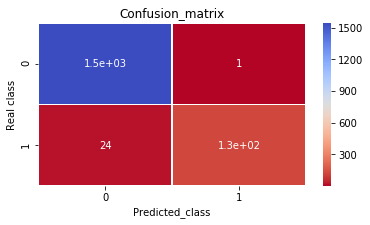


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1547
          1       0.99      0.84      0.91       151

avg / total       0.99      0.99      0.98      1698

recall value test 0.841059602649
________________________________________________________________________________________________________
the undersample data for 10.75 proportion

------------------------------------------------------------

the model classification for 10.75 proportion

length of training data
4046
length of test data
1735

the recall for this model is : 0.84962406015
recall inside 0.84962406015
TP 113
TN 1600
FP 2
FN 20


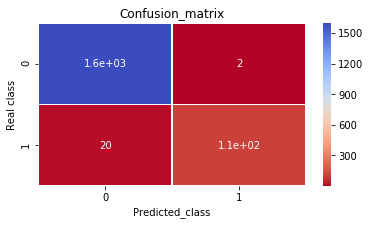


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1602
          1       0.98      0.85      0.91       133

avg / total       0.99      0.99      0.99      1735

recall value test 0.84962406015
________________________________________________________________________________________________________


In [49]:
# Now make undersample data with differnt portion
# here i will take normal trasaction in  0..5 %, 0.66% and 0.75 % proportion of total data now do this for 
j=1.0
rcall_array=[]
proportion_array=[]
for i in range(1,40):
    j=j+0.25 
    
    proportion_array.append(j/(j+1))
    print("the undersample data for {} proportion".format(j))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,j)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(j))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf=LogisticRegression()
    r=model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("recall value test",r)
    rcall_array.append(r)
    
        
    print("________________________________________________________________________________________________________")
    
    
# here 1st proportion conatain 50% normal transaction
#Proportion 2nd contains 66% noraml transaction
#proportion 3rd contains 75 % normal transaction

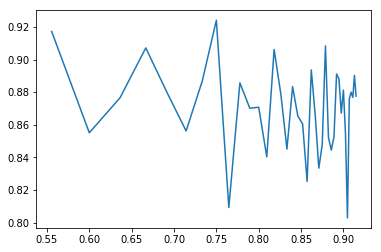

In [37]:
plt.plot(proportion_array,rcall_array)
plt.show()
#proportion_array
#rcall_array

the undersample data for 1.25 proportion

------------------------------------------------------------

the model classification for 1.25 proportion

length of training data
774
length of test data
333
length of training data
199364
length of test data
85443

the recall for this model is : 0.926829268293
recall inside 0.926829268293
TP 152
TN 83173
FP 2106
FN 12


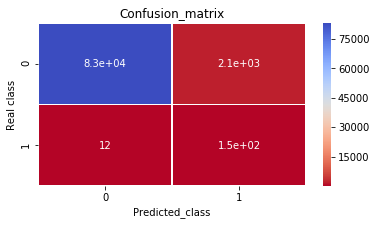


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85279
          1       0.07      0.93      0.13       164

avg / total       1.00      0.98      0.99     85443

_________________________________________________________________________________________
the undersample data for 1.5 proportion

------------------------------------------------------------

the model classification for 1.5 proportion

length of training data
861
length of test data
369
length of training data
199364
length of test data
85443

the recall for this model is : 0.909722222222
recall inside 0.909722222222
TP 131
TN 83576
FP 1723
FN 13


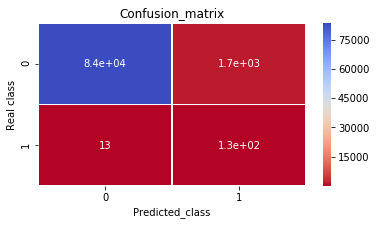


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85299
          1       0.07      0.91      0.13       144

avg / total       1.00      0.98      0.99     85443

_________________________________________________________________________________________
the undersample data for 1.75 proportion

------------------------------------------------------------

the model classification for 1.75 proportion

length of training data
947
length of test data
406
length of training data
199364
length of test data
85443

the recall for this model is : 0.9
recall inside 0.9
TP 135
TN 83326
FP 1967
FN 15


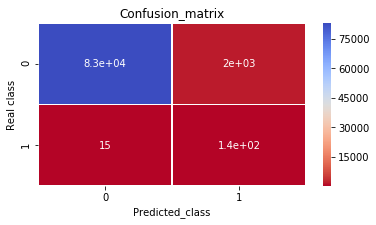


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85293
          1       0.06      0.90      0.12       150

avg / total       1.00      0.98      0.99     85443

_________________________________________________________________________________________
the undersample data for 2.0 proportion

------------------------------------------------------------

the model classification for 2.0 proportion

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443

the recall for this model is : 0.931972789116
recall inside 0.931972789116
TP 137
TN 83803
FP 1493
FN 10


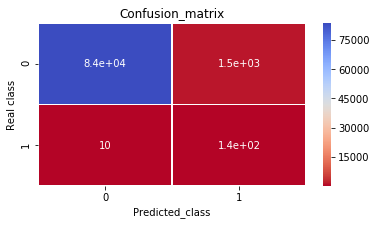


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85296
          1       0.08      0.93      0.15       147

avg / total       1.00      0.98      0.99     85443

_________________________________________________________________________________________
the undersample data for 2.25 proportion

------------------------------------------------------------

the model classification for 2.25 proportion

length of training data
1119
length of test data
480
length of training data
199364
length of test data
85443

the recall for this model is : 0.895424836601
recall inside 0.895424836601
TP 137
TN 83974
FP 1316
FN 16


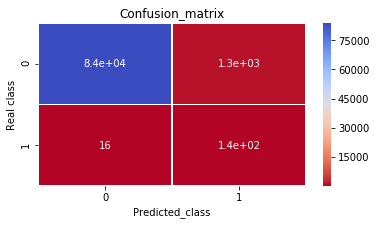


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85290
          1       0.09      0.90      0.17       153

avg / total       1.00      0.98      0.99     85443

_________________________________________________________________________________________
the undersample data for 2.5 proportion

------------------------------------------------------------

the model classification for 2.5 proportion

length of training data
1205
length of test data
517
length of training data
199364
length of test data
85443

the recall for this model is : 0.924657534247
recall inside 0.924657534247
TP 135
TN 83761
FP 1536
FN 11


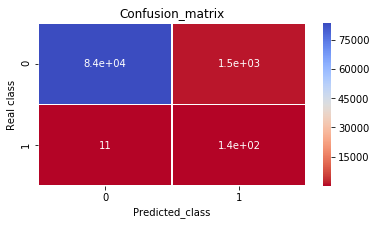


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85297
          1       0.08      0.92      0.15       146

avg / total       1.00      0.98      0.99     85443

_________________________________________________________________________________________
the undersample data for 2.75 proportion

------------------------------------------------------------

the model classification for 2.75 proportion

length of training data
1291
length of test data
554
length of training data
199364
length of test data
85443

the recall for this model is : 0.893617021277
recall inside 0.893617021277
TP 126
TN 84253
FP 1049
FN 15


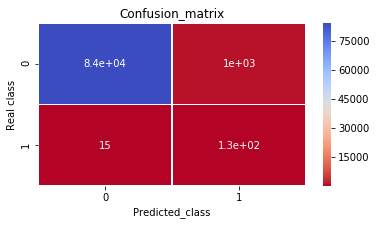


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85302
          1       0.11      0.89      0.19       141

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 3.0 proportion

------------------------------------------------------------

the model classification for 3.0 proportion

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443

the recall for this model is : 0.888198757764
recall inside 0.888198757764
TP 143
TN 84652
FP 630
FN 18


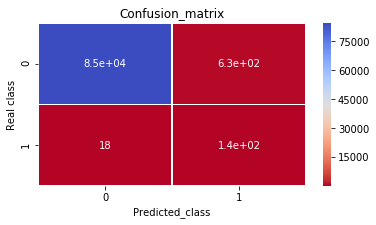


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85282
          1       0.18      0.89      0.31       161

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 3.25 proportion

------------------------------------------------------------

the model classification for 3.25 proportion

length of training data
1463
length of test data
628
length of training data
199364
length of test data
85443

the recall for this model is : 0.93006993007
recall inside 0.93006993007
TP 133
TN 84549
FP 751
FN 10


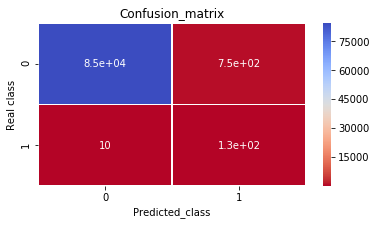


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85300
          1       0.15      0.93      0.26       143

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 3.5 proportion

------------------------------------------------------------

the model classification for 3.5 proportion

length of training data
1549
length of test data
665
length of training data
199364
length of test data
85443

the recall for this model is : 0.860294117647
recall inside 0.860294117647
TP 117
TN 84570
FP 737
FN 19


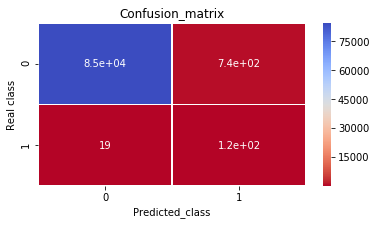


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85307
          1       0.14      0.86      0.24       136

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 3.75 proportion

------------------------------------------------------------

the model classification for 3.75 proportion

length of training data
1635
length of test data
702
length of training data
199364
length of test data
85443

the recall for this model is : 0.91095890411
recall inside 0.91095890411
TP 133
TN 84396
FP 901
FN 13


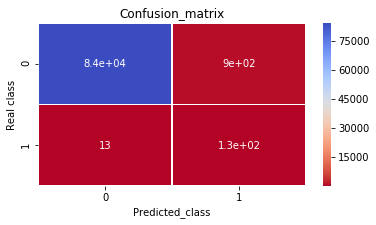


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85297
          1       0.13      0.91      0.23       146

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 4.0 proportion

------------------------------------------------------------

the model classification for 4.0 proportion

length of training data
1722
length of test data
738
length of training data
199364
length of test data
85443

the recall for this model is : 0.837988826816
recall inside 0.837988826816
TP 150
TN 84715
FP 549
FN 29


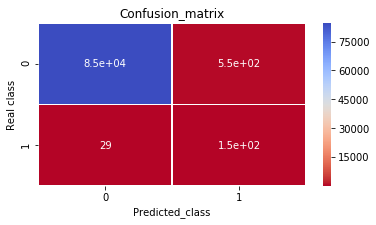


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85264
          1       0.21      0.84      0.34       179

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 4.25 proportion

------------------------------------------------------------

the model classification for 4.25 proportion

length of training data
1808
length of test data
775
length of training data
199364
length of test data
85443

the recall for this model is : 0.844155844156
recall inside 0.844155844156
TP 130
TN 84711
FP 578
FN 24


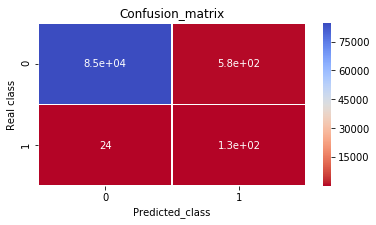


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85289
          1       0.18      0.84      0.30       154

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 4.5 proportion

------------------------------------------------------------

the model classification for 4.5 proportion

length of training data
1894
length of test data
812
length of training data
199364
length of test data
85443

the recall for this model is : 0.85
recall inside 0.85
TP 119
TN 84642
FP 661
FN 21


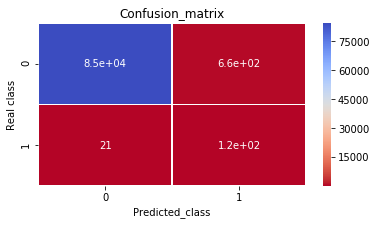


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85303
          1       0.15      0.85      0.26       140

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 4.75 proportion

------------------------------------------------------------

the model classification for 4.75 proportion

length of training data
1980
length of test data
849
length of training data
199364
length of test data
85443

the recall for this model is : 0.902255639098
recall inside 0.902255639098
TP 120
TN 84837
FP 473
FN 13


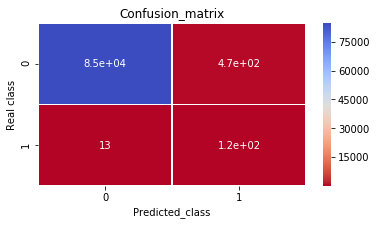


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85310
          1       0.20      0.90      0.33       133

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 5.0 proportion

------------------------------------------------------------

the model classification for 5.0 proportion

length of training data
2066
length of test data
886
length of training data
199364
length of test data
85443

the recall for this model is : 0.860927152318
recall inside 0.860927152318
TP 130
TN 84745
FP 547
FN 21


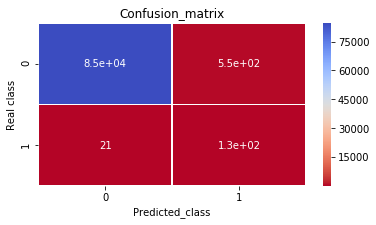


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85292
          1       0.19      0.86      0.31       151

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 5.25 proportion

------------------------------------------------------------

the model classification for 5.25 proportion

length of training data
2152
length of test data
923
length of training data
199364
length of test data
85443

the recall for this model is : 0.927536231884
recall inside 0.927536231884
TP 128
TN 84629
FP 676
FN 10


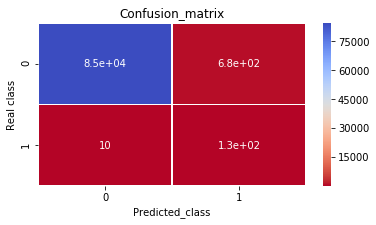


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85305
          1       0.16      0.93      0.27       138

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 5.5 proportion

------------------------------------------------------------

the model classification for 5.5 proportion

length of training data
2238
length of test data
960
length of training data
199364
length of test data
85443

the recall for this model is : 0.865671641791
recall inside 0.865671641791
TP 116
TN 84884
FP 425
FN 18


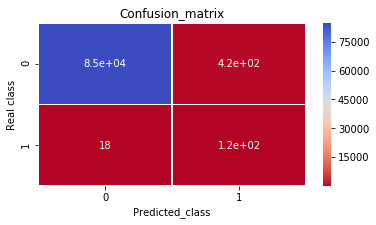


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85309
          1       0.21      0.87      0.34       134

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 5.75 proportion

------------------------------------------------------------

the model classification for 5.75 proportion

length of training data
2324
length of test data
997
length of training data
199364
length of test data
85443

the recall for this model is : 0.846153846154
recall inside 0.846153846154
TP 132
TN 84782
FP 505
FN 24


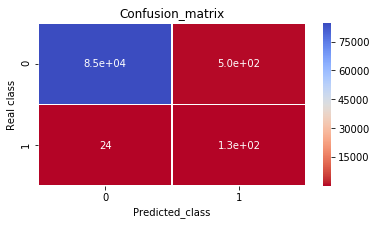


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85287
          1       0.21      0.85      0.33       156

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 6.0 proportion

------------------------------------------------------------

the model classification for 6.0 proportion

length of training data
2410
length of test data
1034
length of training data
199364
length of test data
85443

the recall for this model is : 0.879194630872
recall inside 0.879194630872
TP 131
TN 84841
FP 453
FN 18


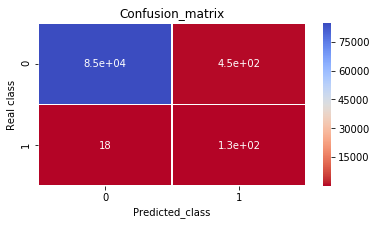


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85294
          1       0.22      0.88      0.36       149

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 6.25 proportion

------------------------------------------------------------

the model classification for 6.25 proportion

length of training data
2496
length of test data
1071
length of training data
199364
length of test data
85443

the recall for this model is : 0.857142857143
recall inside 0.857142857143
TP 138
TN 84850
FP 432
FN 23


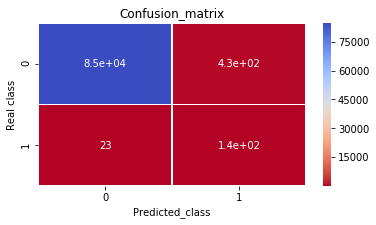


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85282
          1       0.24      0.86      0.38       161

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 6.5 proportion

------------------------------------------------------------

the model classification for 6.5 proportion

length of training data
2583
length of test data
1107
length of training data
199364
length of test data
85443

the recall for this model is : 0.861788617886
recall inside 0.861788617886
TP 106
TN 84802
FP 518
FN 17


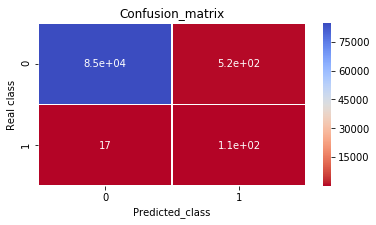


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85320
          1       0.17      0.86      0.28       123

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 6.75 proportion

------------------------------------------------------------

the model classification for 6.75 proportion

length of training data
2669
length of test data
1144
length of training data
199364
length of test data
85443

the recall for this model is : 0.885350318471
recall inside 0.885350318471
TP 139
TN 84831
FP 455
FN 18


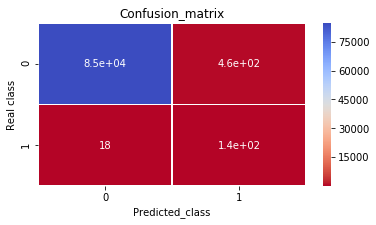


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85286
          1       0.23      0.89      0.37       157

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 7.0 proportion

------------------------------------------------------------

the model classification for 7.0 proportion

length of training data
2755
length of test data
1181
length of training data
199364
length of test data
85443

the recall for this model is : 0.863309352518
recall inside 0.863309352518
TP 120
TN 84810
FP 494
FN 19


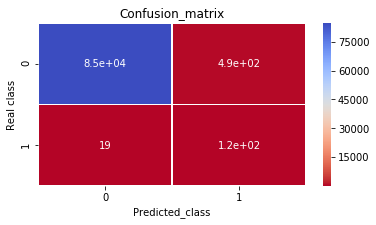


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85304
          1       0.20      0.86      0.32       139

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 7.25 proportion

------------------------------------------------------------

the model classification for 7.25 proportion

length of training data
2841
length of test data
1218
length of training data
199364
length of test data
85443

the recall for this model is : 0.9
recall inside 0.9
TP 126
TN 84870
FP 433
FN 14


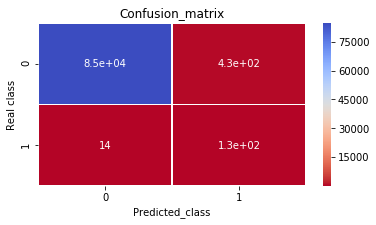


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85303
          1       0.23      0.90      0.36       140

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 7.5 proportion

------------------------------------------------------------

the model classification for 7.5 proportion

length of training data
2927
length of test data
1255
length of training data
199364
length of test data
85443

the recall for this model is : 0.896774193548
recall inside 0.896774193548
TP 139
TN 85030
FP 258
FN 16


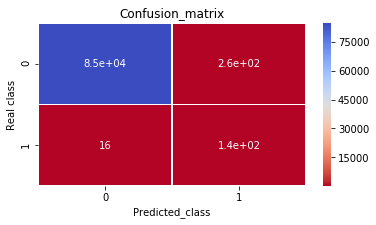


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85288
          1       0.35      0.90      0.50       155

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 7.75 proportion

------------------------------------------------------------

the model classification for 7.75 proportion

length of training data
3013
length of test data
1292
length of training data
199364
length of test data
85443

the recall for this model is : 0.841772151899
recall inside 0.841772151899
TP 133
TN 85004
FP 281
FN 25


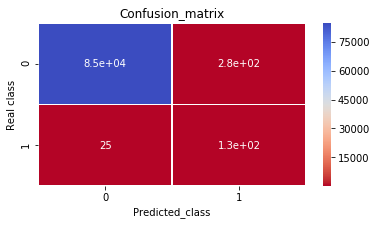


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.32      0.84      0.47       158

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 8.0 proportion

------------------------------------------------------------

the model classification for 8.0 proportion

length of training data
3099
length of test data
1329
length of training data
199364
length of test data
85443

the recall for this model is : 0.847682119205
recall inside 0.847682119205
TP 128
TN 85004
FP 288
FN 23


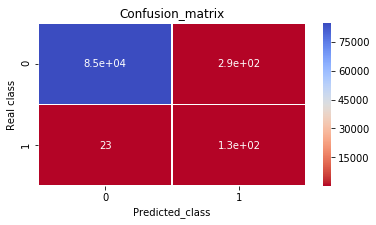


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85292
          1       0.31      0.85      0.45       151

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 8.25 proportion

------------------------------------------------------------

the model classification for 8.25 proportion

length of training data
3185
length of test data
1366
length of training data
199364
length of test data
85443

the recall for this model is : 0.84
recall inside 0.84
TP 126
TN 85068
FP 225
FN 24


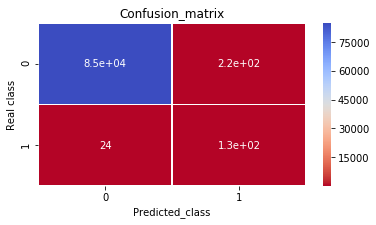


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85293
          1       0.36      0.84      0.50       150

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 8.5 proportion

------------------------------------------------------------

the model classification for 8.5 proportion

length of training data
3271
length of test data
1403
length of training data
199364
length of test data
85443

the recall for this model is : 0.858064516129
recall inside 0.858064516129
TP 133
TN 84929
FP 359
FN 22


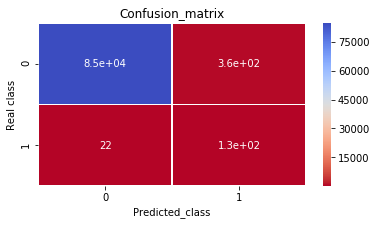


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85288
          1       0.27      0.86      0.41       155

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 8.75 proportion

------------------------------------------------------------

the model classification for 8.75 proportion

length of training data
3357
length of test data
1440
length of training data
199364
length of test data
85443

the recall for this model is : 0.865030674847
recall inside 0.865030674847
TP 141
TN 85042
FP 238
FN 22


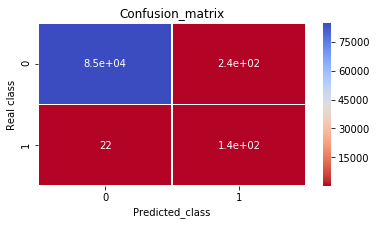


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85280
          1       0.37      0.87      0.52       163

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 9.0 proportion

------------------------------------------------------------

the model classification for 9.0 proportion

length of training data
3444
length of test data
1476
length of training data
199364
length of test data
85443

the recall for this model is : 0.86
recall inside 0.86
TP 129
TN 85094
FP 199
FN 21


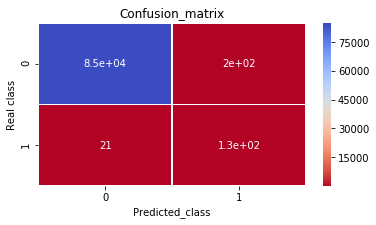


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85293
          1       0.39      0.86      0.54       150

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 9.25 proportion

------------------------------------------------------------

the model classification for 9.25 proportion

length of training data
3530
length of test data
1513
length of training data
199364
length of test data
85443

the recall for this model is : 0.838926174497
recall inside 0.838926174497
TP 125
TN 85080
FP 214
FN 24


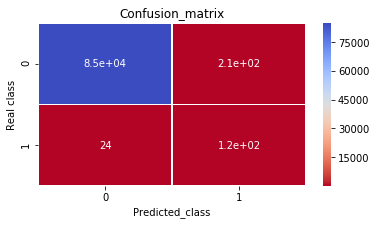


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85294
          1       0.37      0.84      0.51       149

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 9.5 proportion

------------------------------------------------------------

the model classification for 9.5 proportion

length of training data
3616
length of test data
1550
length of training data
199364
length of test data
85443

the recall for this model is : 0.905063291139
recall inside 0.905063291139
TP 143
TN 85086
FP 199
FN 15


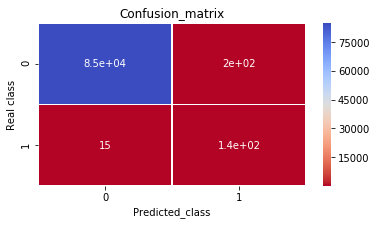


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85285
          1       0.42      0.91      0.57       158

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 9.75 proportion

------------------------------------------------------------

the model classification for 9.75 proportion

length of training data
3702
length of test data
1587
length of training data
199364
length of test data
85443

the recall for this model is : 0.861538461538
recall inside 0.861538461538
TP 112
TN 85152
FP 161
FN 18


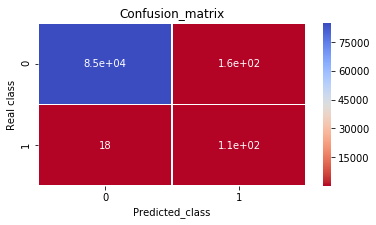


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85313
          1       0.41      0.86      0.56       130

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 10.0 proportion

------------------------------------------------------------

the model classification for 10.0 proportion

length of training data
3788
length of test data
1624
length of training data
199364
length of test data
85443

the recall for this model is : 0.857142857143
recall inside 0.857142857143
TP 138
TN 85138
FP 144
FN 23


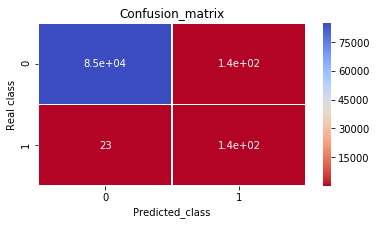


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85282
          1       0.49      0.86      0.62       161

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 10.25 proportion

------------------------------------------------------------

the model classification for 10.25 proportion

length of training data
3874
length of test data
1661
length of training data
199364
length of test data
85443

the recall for this model is : 0.842105263158
recall inside 0.842105263158
TP 128
TN 85028
FP 263
FN 24


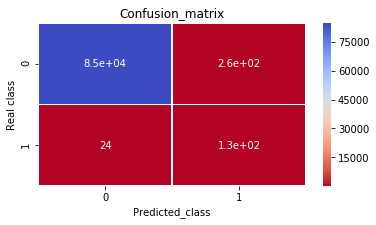


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85291
          1       0.33      0.84      0.47       152

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 10.5 proportion

------------------------------------------------------------

the model classification for 10.5 proportion

length of training data
3960
length of test data
1698
length of training data
199364
length of test data
85443

the recall for this model is : 0.880952380952
recall inside 0.880952380952
TP 111
TN 85057
FP 260
FN 15


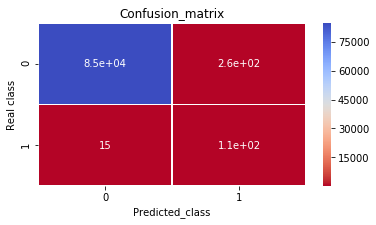


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85317
          1       0.30      0.88      0.45       126

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 10.75 proportion

------------------------------------------------------------

the model classification for 10.75 proportion

length of training data
4046
length of test data
1735
length of training data
199364
length of test data
85443

the recall for this model is : 0.863945578231
recall inside 0.863945578231
TP 127
TN 85062
FP 234
FN 20


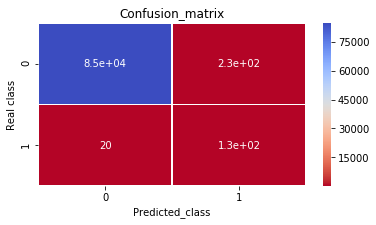


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.35      0.86      0.50       147

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 11.0 proportion

------------------------------------------------------------

the model classification for 11.0 proportion

length of training data
4132
length of test data
1772
length of training data
199364
length of test data
85443

the recall for this model is : 0.84
recall inside 0.84
TP 126
TN 85131
FP 162
FN 24


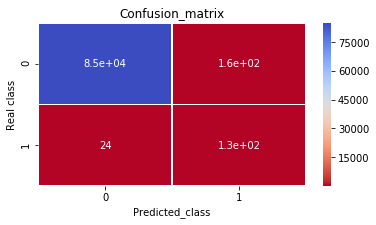


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85293
          1       0.44      0.84      0.58       150

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 11.25 proportion

------------------------------------------------------------

the model classification for 11.25 proportion

length of training data
4218
length of test data
1809
length of training data
199364
length of test data
85443

the recall for this model is : 0.867647058824
recall inside 0.867647058824
TP 118
TN 85077
FP 230
FN 18


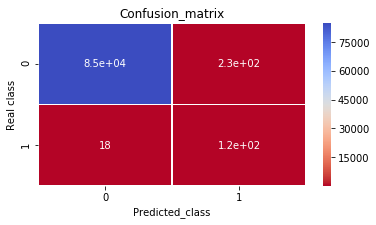


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.34      0.87      0.49       136

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 11.5 proportion

------------------------------------------------------------

the model classification for 11.5 proportion

length of training data
4305
length of test data
1845
length of training data
199364
length of test data
85443

the recall for this model is : 0.857142857143
recall inside 0.857142857143
TP 132
TN 85074
FP 215
FN 22


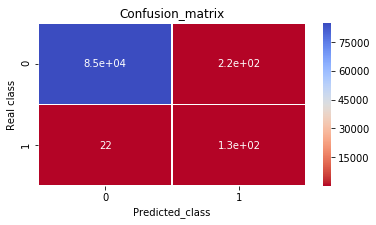


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85289
          1       0.38      0.86      0.53       154

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 11.75 proportion

------------------------------------------------------------

the model classification for 11.75 proportion

length of training data
4391
length of test data
1882
length of training data
199364
length of test data
85443

the recall for this model is : 0.861538461538
recall inside 0.861538461538
TP 112
TN 85186
FP 127
FN 18


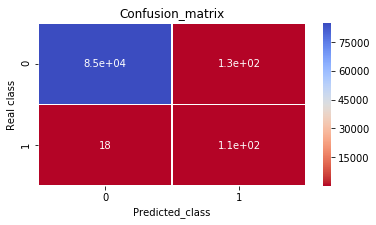


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85313
          1       0.47      0.86      0.61       130

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 12.0 proportion

------------------------------------------------------------

the model classification for 12.0 proportion

length of training data
4477
length of test data
1919
length of training data
199364
length of test data
85443

the recall for this model is : 0.808219178082
recall inside 0.808219178082
TP 118
TN 85145
FP 152
FN 28


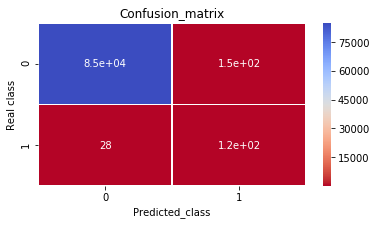


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85297
          1       0.44      0.81      0.57       146

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 12.25 proportion

------------------------------------------------------------

the model classification for 12.25 proportion

length of training data
4563
length of test data
1956
length of training data
199364
length of test data
85443

the recall for this model is : 0.838028169014
recall inside 0.838028169014
TP 119
TN 85123
FP 178
FN 23


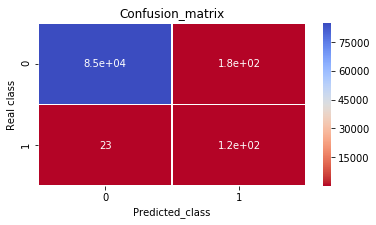


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85301
          1       0.40      0.84      0.54       142

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 12.5 proportion

------------------------------------------------------------

the model classification for 12.5 proportion

length of training data
4649
length of test data
1993
length of training data
199364
length of test data
85443

the recall for this model is : 0.876623376623
recall inside 0.876623376623
TP 135
TN 85110
FP 179
FN 19


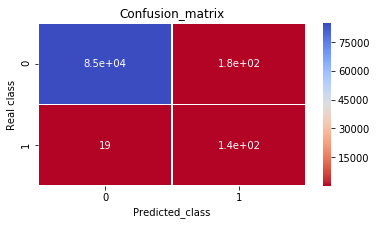


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85289
          1       0.43      0.88      0.58       154

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 12.75 proportion

------------------------------------------------------------

the model classification for 12.75 proportion

length of training data
4735
length of test data
2030
length of training data
199364
length of test data
85443

the recall for this model is : 0.876712328767
recall inside 0.876712328767
TP 128
TN 85161
FP 136
FN 18


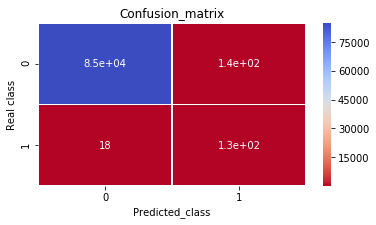


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85297
          1       0.48      0.88      0.62       146

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 13.0 proportion

------------------------------------------------------------

the model classification for 13.0 proportion

length of training data
4821
length of test data
2067
length of training data
199364
length of test data
85443

the recall for this model is : 0.855263157895
recall inside 0.855263157895
TP 130
TN 85142
FP 149
FN 22


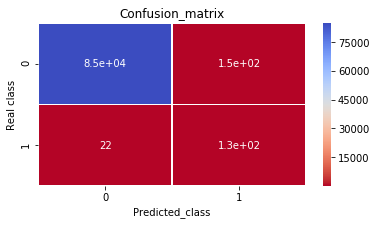


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85291
          1       0.47      0.86      0.60       152

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________
the undersample data for 13.25 proportion

------------------------------------------------------------

the model classification for 13.25 proportion

length of training data
4907
length of test data
2104
length of training data
199364
length of test data
85443

the recall for this model is : 0.868055555556
recall inside 0.868055555556
TP 125
TN 85064
FP 235
FN 19


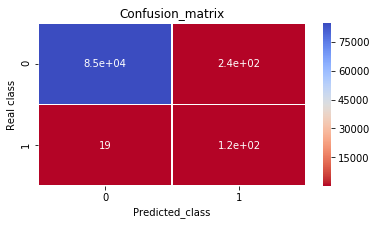


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85299
          1       0.35      0.87      0.50       144

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________


In [81]:
#let us train this model using undersample data and test for the whole data test set 
j=1.0
rcall_array=[]
proportion_array=[]
for i in range(1,50):
    j=j+0.25 
    
    proportion_array.append(j/(j+1))
    print("the undersample data for {} proportion".format(j))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,j)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(j))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=LogisticRegression()
    r=model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    
    rcall_array.append(r)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

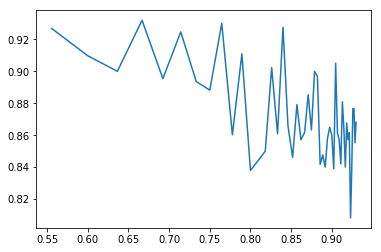

In [82]:
plt.plot(proportion_array,rcall_array)
plt.show()
#proportion_array
#rcall_array

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
X_data = data.ix[:, data.columns != 'Class']
y_data = data.ix[:, data.columns == 'Class']

In [87]:
# before starting we should standridze our ampount column
data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()
X_data = data.ix[:, data.columns != 'Class']
y_data = data.ix[:, data.columns == 'Class']

KeyError: 'Amount'